# Heart Failure Prediction Model 

   The main goal of this project is to use the Machine Learning techniques to predict the mortality rate of the patients with reported heart failure. We will explore 3 types of algorithms: the Nearest Neighbors algorithms, Support Vector Machines, and Xgboost algorithms. 
Data used:
Heart failure clinical records Data Set
https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

In [176]:
#import the necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

In [177]:
#get the data
df= pd.read_csv(r'C:\Users\6paan\Desktop\PROJECTS\heart_failure_clinical_records_dataset.csv')
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [179]:
df.isnull().sum()
# no missing data

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [180]:
#Split the data into labels and target 
y = df["DEATH_EVENT"]
X = df[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes','ejection_fraction', 'high_blood_pressure', 'platelets','serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]

In [181]:
#split the labels and target into a train and test data set respectively 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=343)

In [182]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((239, 12), (60, 12), (239,), (60,))

In [183]:
#Scale the data 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Creating  the KNN Model

First lets use the KNeighborsClassifier to see how the model works on this dataset

In [184]:
KNC = KNeighborsClassifier()

In [185]:
KNC.fit(X_train,y_train)
y_pred = KNC.predict(X_test)

In [186]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.93      0.84        42
           1       0.67      0.33      0.44        18

    accuracy                           0.75        60
   macro avg       0.72      0.63      0.64        60
weighted avg       0.74      0.75      0.72        60



#  KNN Hyperparameter Optimization



In [187]:
from sklearn.model_selection import GridSearchCV

In [199]:
rf_params = {
    'n_neighbors': [3,5,7,9,11],
    'leaf_size' : [1,3,5,10],
    'p' :[1,2],
}
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, rf_params, cv=10, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred_knn = grid.predict(X_test)

{'leaf_size': 1, 'n_neighbors': 9, 'p': 2}


In [207]:
print(classification_report(y_test, y_pred_knn))
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

              precision    recall  f1-score   support

           0       0.75      1.00      0.86        42
           1       1.00      0.22      0.36        18

    accuracy                           0.77        60
   macro avg       0.88      0.61      0.61        60
weighted avg       0.82      0.77      0.71        60

The accuracy score achieved using KNN is: 76.67 %


# Creating SVM Model

In [190]:
sv = svm.SVC()
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)

In [191]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.84      0.90      0.87        42
           1       0.73      0.61      0.67        18

    accuracy                           0.82        60
   macro avg       0.79      0.76      0.77        60
weighted avg       0.81      0.82      0.81        60



# SVM Hyperparameter Optimization

In [201]:
rf_params = {
    'C': [1,15,30],
    "kernel":['linear','poly','rbf','sigmoid'],
    
}
clf = SVC(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred_svm = grid.predict(X_test)

{'C': 1, 'kernel': 'sigmoid'}


In [208]:
print(classification_report(y_test, y_pred_svm))
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        42
           1       0.67      0.67      0.67        18

    accuracy                           0.80        60
   macro avg       0.76      0.76      0.76        60
weighted avg       0.80      0.80      0.80        60

The accuracy score achieved using Linear SVM is: 80.0 %


# Creating Xgboost Model

In [215]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [216]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      0.83      0.82        42
           1       0.59      0.56      0.57        18

    accuracy                           0.75        60
   macro avg       0.70      0.69      0.70        60
weighted avg       0.75      0.75      0.75        60



# Xgboost Hyperparameter Optimization

In [209]:
rf_params = {
        'n_estimators' : [20,40,50,80],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.5, 0.6, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0,2.0],
        'max_depth': [1,5,7,11]
        }
clf = xgb.XGBClassifier()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
print(grid.best_params_)
y_pred_xgb= grid.predict(X_test)

{'colsample_bytree': 0.8, 'gamma': 1.5, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.6}


In [210]:
print(classification_report(y_test, y_pred_xgb))
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)
print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

              precision    recall  f1-score   support

           0       0.85      0.83      0.84        42
           1       0.63      0.67      0.65        18

    accuracy                           0.78        60
   macro avg       0.74      0.75      0.75        60
weighted avg       0.79      0.78      0.78        60

The accuracy score achieved using XGBoost is: 78.33 %


# Conclusion 

In [219]:
scores = [score_svm,score_knn, score_xgb]
algorithms = ["Support Vector Machine","K-Nearest Neighbors", "XGBoost"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Support Vector Machine is: 80.0 %
The accuracy score achieved using K-Nearest Neighbors is: 76.67 %
The accuracy score achieved using XGBoost is: 78.33 %


<AxesSubplot:xlabel='Algorithms', ylabel='Accuracy score'>

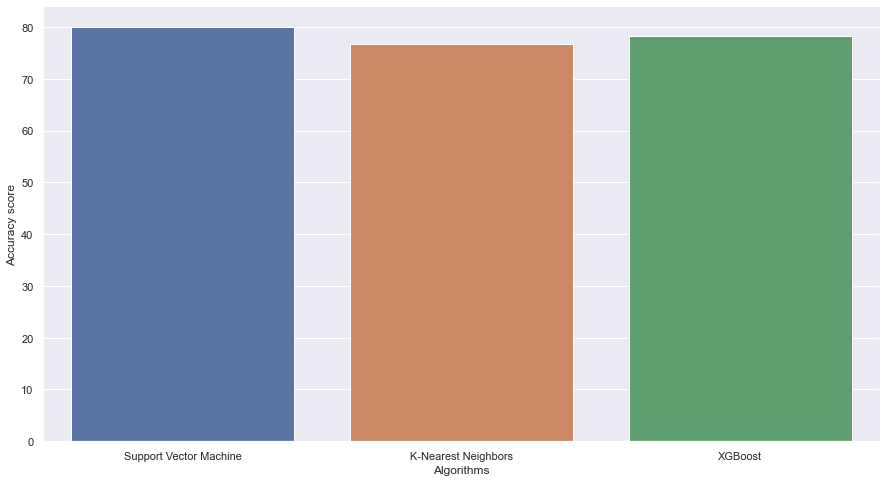

In [220]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(algorithms,scores)